## IMPORTING THE LIBRARIES AND LOADING THE DATASET

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df=pd.read_csv('CarPrice.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## UNDERSTANDING THE CATEGORICAL FEATURES

In [68]:
car_categorical=df.select_dtypes(include=['object'])
car_categorical

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


## MODIFYING THE COLUMNS Doornumber AND Cylindernumber TO INT TYPE

In [69]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df.replace(cleanup_nums, inplace=True)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## UNDERSTANDING THE NUMERICAL DATA

In [70]:
car_numeric=df.select_dtypes(include=['float64','int64'])
car_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   cylindernumber    205 non-null    int64  
 9   enginesize        205 non-null    int64  
 10  boreratio         205 non-null    float64
 11  stroke            205 non-null    float64
 12  compressionratio  205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  peakrpm           205 non-null    int64  
 15  citympg           205 non-null    int64  
 16  highwaympg        205 non-null    int64  
 1

## DROPPING THE COLUMNS WITH NO SIGNIFICANT ROLE 

In [71]:
car_numeric=car_numeric.drop(['car_ID','symboling'],axis=1)
car_numeric

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## CORRECTING THE TYPOS IN COMPANY NAMES

In [72]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [73]:
df.CompanyName.replace('maxda','mazda',inplace=True)
df.CompanyName.replace('porcshce','porsche',inplace=True)
df.CompanyName.replace('toyouta','toyota',inplace=True)
df.CompanyName.replace('vokswagen','volkswagen',inplace=True)
df.CompanyName.replace('vw','volkswagen',inplace=True)
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## VISUALIZATION OF DISTRIBUTION OF PRICE VALUES

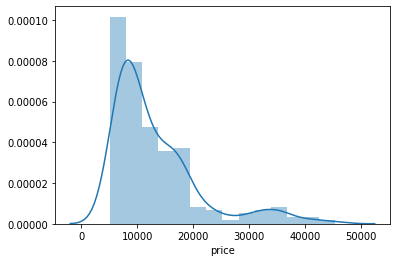

In [74]:
sns.distplot(df['price'])

### VISUALIZATION OF CAR COMPANIES

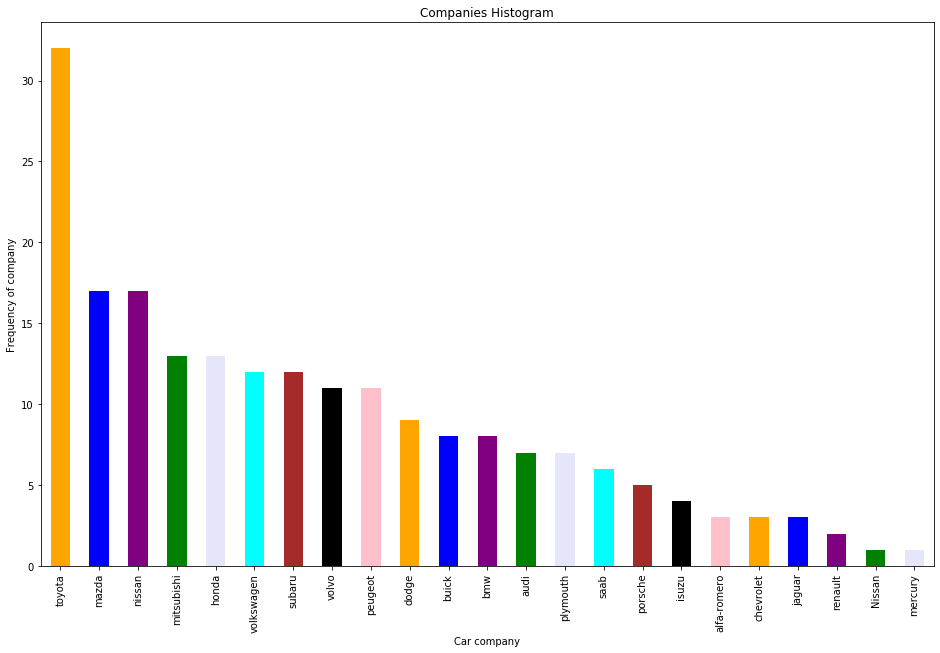

In [76]:
plt.figure(figsize=(16,10))
plt1 = df['CompanyName'].value_counts().plot(kind='bar',color=['orange', 'blue', 'purple', 'green', 'lavender','cyan','brown','black','pink'])
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.show()


## INSIGHT : 
### TOYOTA ,MAZDA,NISSAN ARE FAVOURITE CAR COMAPNIES OF THE CUSTOMERS

## VISUALIZATION OF THE FUEL TYPE 

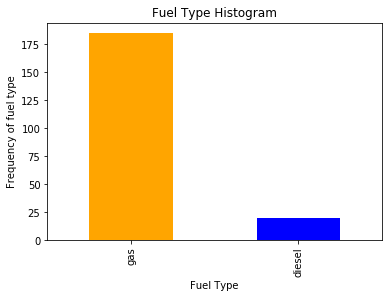

In [77]:
plt2 = df['fueltype'].value_counts().plot(kind='bar',color=['orange', 'blue'])
plt.title('Fuel Type Histogram')
plt2.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
plt.show()

### INSIGHT :
### GAS IS MOSTLY USED FUEL TYPE 

## VISUALIZATION OF CAR TYPE

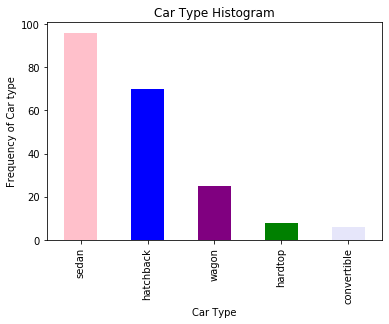

In [78]:

plt3 = df['carbody'].value_counts().plot(kind='bar',color=['pink', 'blue', 'purple', 'green', 'lavender'])
plt.title('Car Type Histogram')
plt3.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


### INSIGHT: SEDAN IS MOST PURCHASED CAR TYPE 

## VISUALIZATION OF ENGINE TYPE

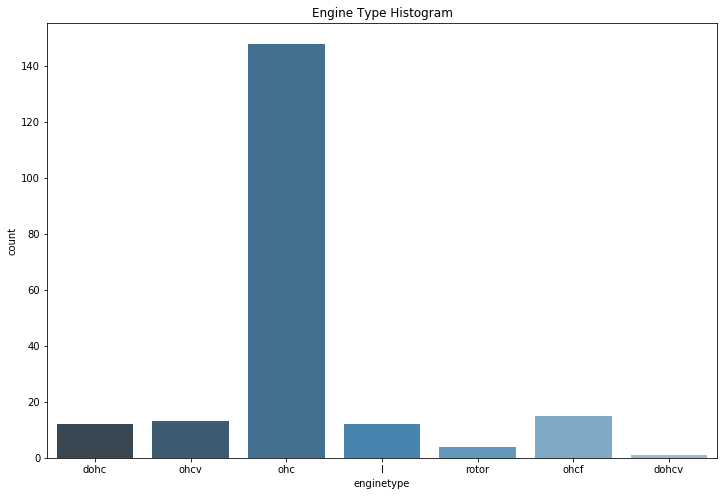

In [79]:
plt.figure(figsize=(12,8))
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))


### INSIGHT : THE CARS WITH ENGINE TYPE OHC IS HIGHLY PREFERRED AND SOLD 

## VISUALIZATION OF CAR WITH DIFF CYLINDER NUMBERS

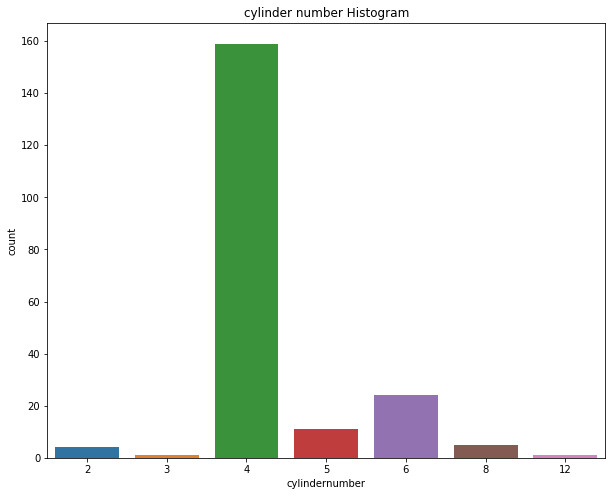

In [80]:
plt.figure(figsize=(10,8))
plt.title('cylinder number Histogram')
sns.countplot(df.cylindernumber)

### INSIGHT CARS WITH 4 CYLINDERS ARE PREFERRED OVER OTHERS

## VISUALIZATION OF CAR ENGINE'S LOCATION

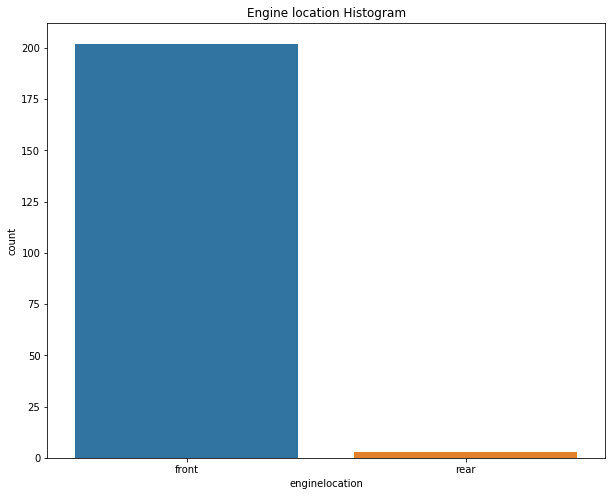

In [81]:
plt.figure(figsize=(10,8))
plt.title('Engine location Histogram')
sns.countplot(df.enginelocation)

## VISUALIZING THE CORRELATION OF THE FEATURES WITH RESPECT TO PRICE

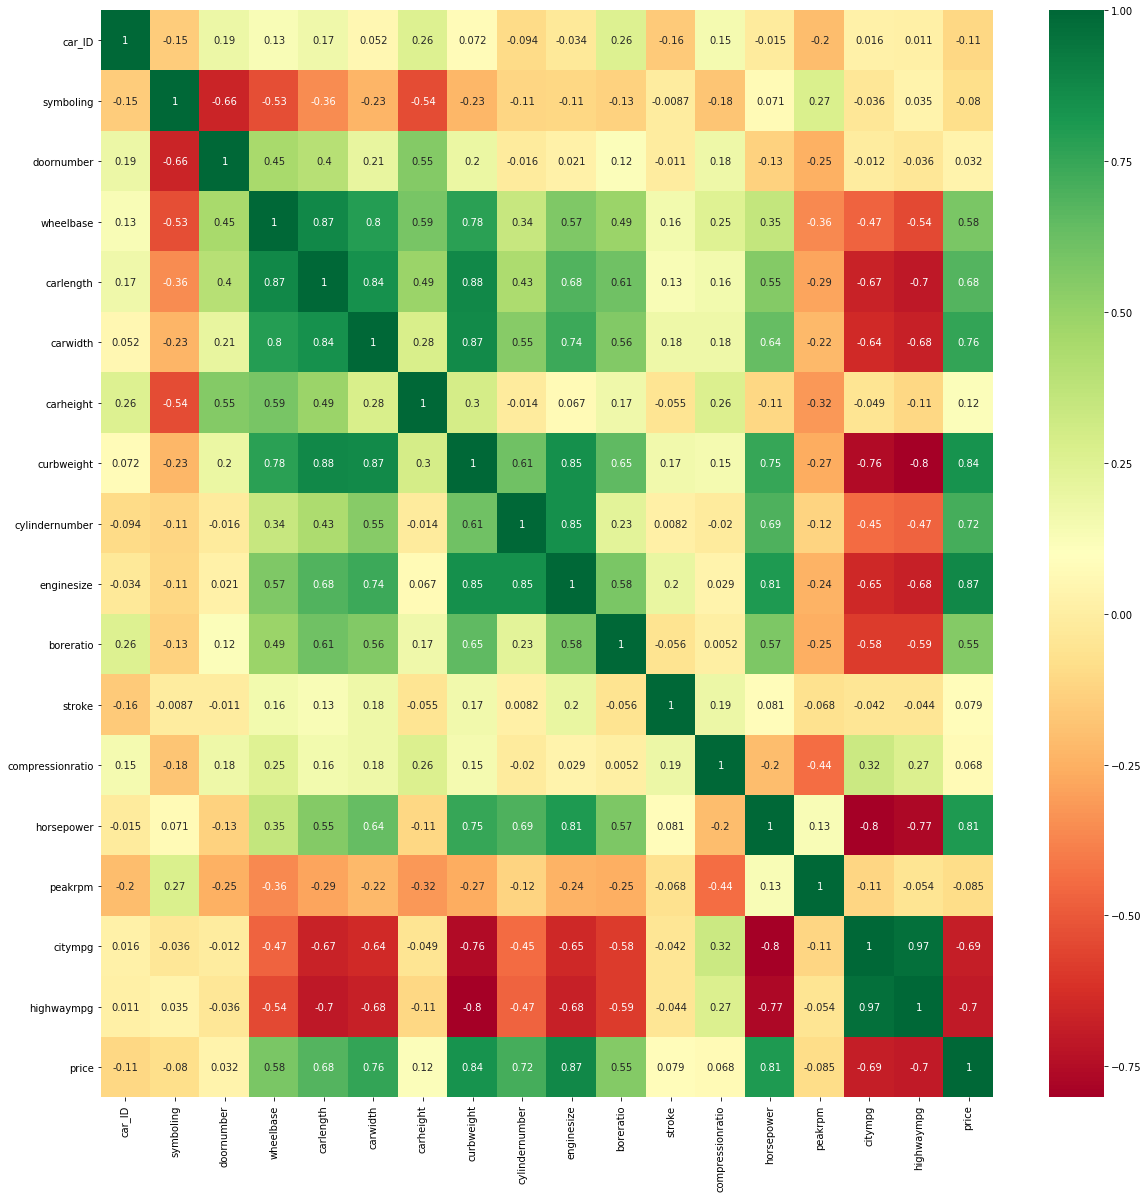

In [82]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

### INSIGHT: THESE ARE THE FEATURES THAT CONTRIBUTE SIGNIFICANTLY IN DETERMINING THE PRICE OF THE CAR 

### 'enginesize','curbweight','horsepower','carwidth','cylindernumber','carlength','wheelbase','boreratio'

### Data Building For The Model

In [83]:

x=car_numeric.iloc[:,0:13].values
y=car_numeric.iloc[:,13].values
print(x)
print('-----------')
print(y)

[[2.000e+00 8.860e+01 1.688e+02 ... 9.000e+00 1.110e+02 5.000e+03]
 [2.000e+00 8.860e+01 1.688e+02 ... 9.000e+00 1.110e+02 5.000e+03]
 [2.000e+00 9.450e+01 1.712e+02 ... 9.000e+00 1.540e+02 5.000e+03]
 ...
 [4.000e+00 1.091e+02 1.888e+02 ... 8.800e+00 1.340e+02 5.500e+03]
 [4.000e+00 1.091e+02 1.888e+02 ... 2.300e+01 1.060e+02 4.800e+03]
 [4.000e+00 1.091e+02 1.888e+02 ... 9.500e+00 1.140e+02 5.400e+03]]
-----------
[21 21 19 24 18 19 19 19 17 16 23 23 21 21 20 16 16 15 47 38 38 37 31 24
 31 31 31 24 24 19 49 31 38 30 30 30 30 27 27 27 27 24 25 24 38 38 24 15
 15 13 30 31 31 31 31 17 17 17 16 26 26 26 26 36 26 19 31 22 22 22 22 16
 16 14 14 19 37 31 31 24 23 25 19 19 19 25 25 23 23 31 45 31 31 31 31 31
 31 31 31 27 27 17 17 19 19 17 19 19 28 19 25 19 28 19 25 19 28 18 37 24
 31 31 31 24 19 19 17 17 17 17 23 23 21 21 21 21 19 19 31 26 26 32 28 26
 24 24 28 25 23 23 35 31 31 31 27 27 30 30 34 38 38 28 28 29 29 26 26 24
 24 24 24 24 24 29 30 27 27 27 20 19 20 19 37 27 37 27 27 37 26 24 24

### Spliting the data into Training data and Testing data

In [84]:

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [85]:
print (x_train.shape)
x_test.shape

(153, 13)


(52, 13)

## Building the Linear Regression Model

In [86]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
y_pred=model.predict(x_test)
y_pred

array([31.93090063, 17.6715334 , 24.2591189 , 36.49645311, 27.05268545,
       22.80963067, 31.6514079 , 29.58683668, 18.89278398, 32.02011667,
       24.53600988,  9.60570982, 21.73857222, 33.37405297, 32.42679628,
       23.71089658, 25.25052753, 20.74802932, 27.79807589, 32.40846777,
       22.501192  , 19.63761117, 25.50740486, 22.56319077, 18.36826894,
       30.52066786, 30.25265324, 16.80176621, 29.93204859, 31.58239836,
       28.00505688, 24.26720176, 20.31913306, 27.93689839, 31.77080053,
       13.56180129, 28.42196656, 16.0480997 , 31.82269232, 16.50210884,
       32.13981816, 22.23159294, 16.53851739, 19.72859996, 23.0102714 ,
       28.91093472, 31.52854362, 18.48011264, 21.87774565, 28.07375966,
       17.29922847, 37.88817138])

In [88]:
y_test

array([31, 19, 19, 47, 26, 24, 37, 27, 19, 30, 21, 17, 17, 31, 38, 24, 23,
       19, 27, 31, 23, 19, 23, 24, 19, 31, 30, 19, 28, 31, 27, 25, 19, 29,
       31, 16, 24, 19, 31, 14, 38, 18, 16, 21, 24, 31, 31, 19, 23, 27, 17,
       45], dtype=int64)

In [90]:
df1=pd.DataFrame({'Actual_values':y_test,'predicted':y_pred})
df1.head()

,Actual_values,predicted
0,31,31.930901
1,19,17.671533
2,19,24.259119
3,47,36.496453
4,26,27.052685


### Visualizing the predicted values with the actual values

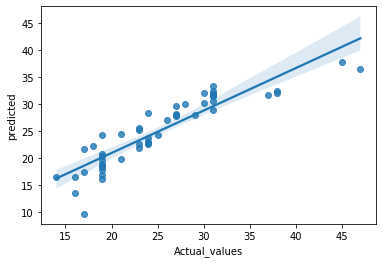

In [91]:
import seaborn as sns
sns.regplot(x='Actual_values',y='predicted',data=df1)

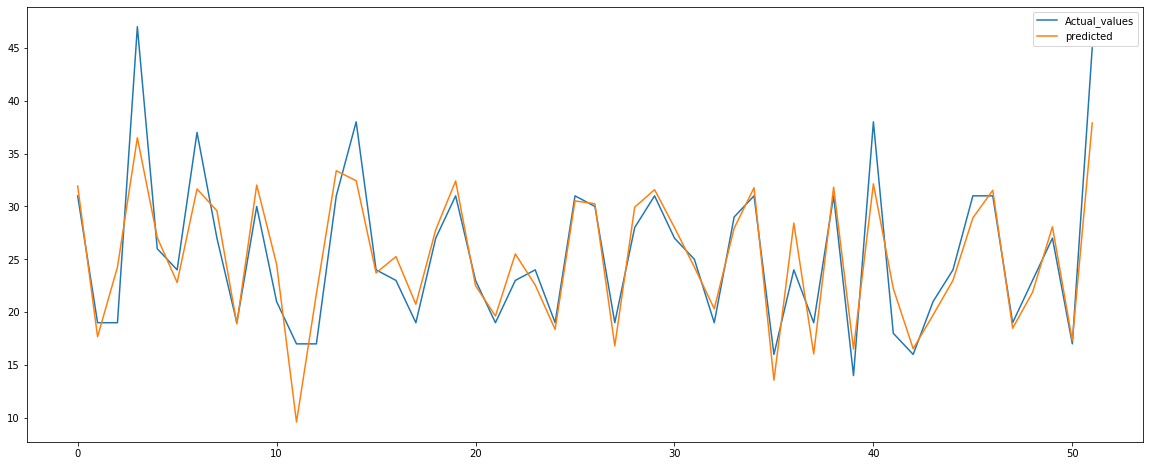

In [92]:
#pandas plotting
df1.plot(figsize=(20,8),kind='line')

### Calculating the metrics of the model

In [93]:
from sklearn.metrics import r2_score,mean_squared_error

In [94]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

9.568814989185226
0.8165310491554323


### Accuracy of the model is 81.65%

### Increase the accuracy of the model using the Ridge Hyperparameter Tuning

In [95]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [96]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [97]:
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [98]:
prediction_ridge=ridge_regressor.predict(x_test)
print(r2_score(y_test,prediction_ridge))

0.8427324596622205


## Accuracy is 84.27%
### Hence the accuracy is increased by 2.62%